# The ``no_order`` Argument

By default, if ``together=False``, the MICA2 module will start a separate run of MICA2 for each line. However, MICA2 has the functionality to run multiple datasets at once.

The one downside to this is that the lags for each dataset will be governed by the same lag prior type. In MICA2, lags from different line/datasets are not allowed to be equal, and there may be different restrictions for the spacing between lags as well.

Therefore, to get around this ``no_order=True`` by default, to create a separate run of MICA2 for each line. However, if the order of the lags is not significant to one's research goals (i.e., lags are not required to be the same), the user can set ``no_order=False`` to run all datasets at once.

Here, we'll run the javelin test dataset with ``no_order=False``:

In [ ]:
%matplotlib inline
import pypetal.pipeline as pl

main_dir = 'pypetal/examples/dat/javelin_'
line_names = ['continuum', 'yelm', 'zing']
filenames = [ main_dir + x + '.dat' for x in line_names ]

output_dir = 'mica2_output3/'



params = {
    'max_num_saves': 4000,
    'type_tf': "tophat",
    'no_order': False
}

res = pl.run_pipeline(output_dir, filenames, line_names,
                      run_mica2=True, mica2_params=params,
                      verbose=True, plot=True, time_unit='d',
                      file_fmt='ascii', lag_bounds=[-500, 500])

### Output:

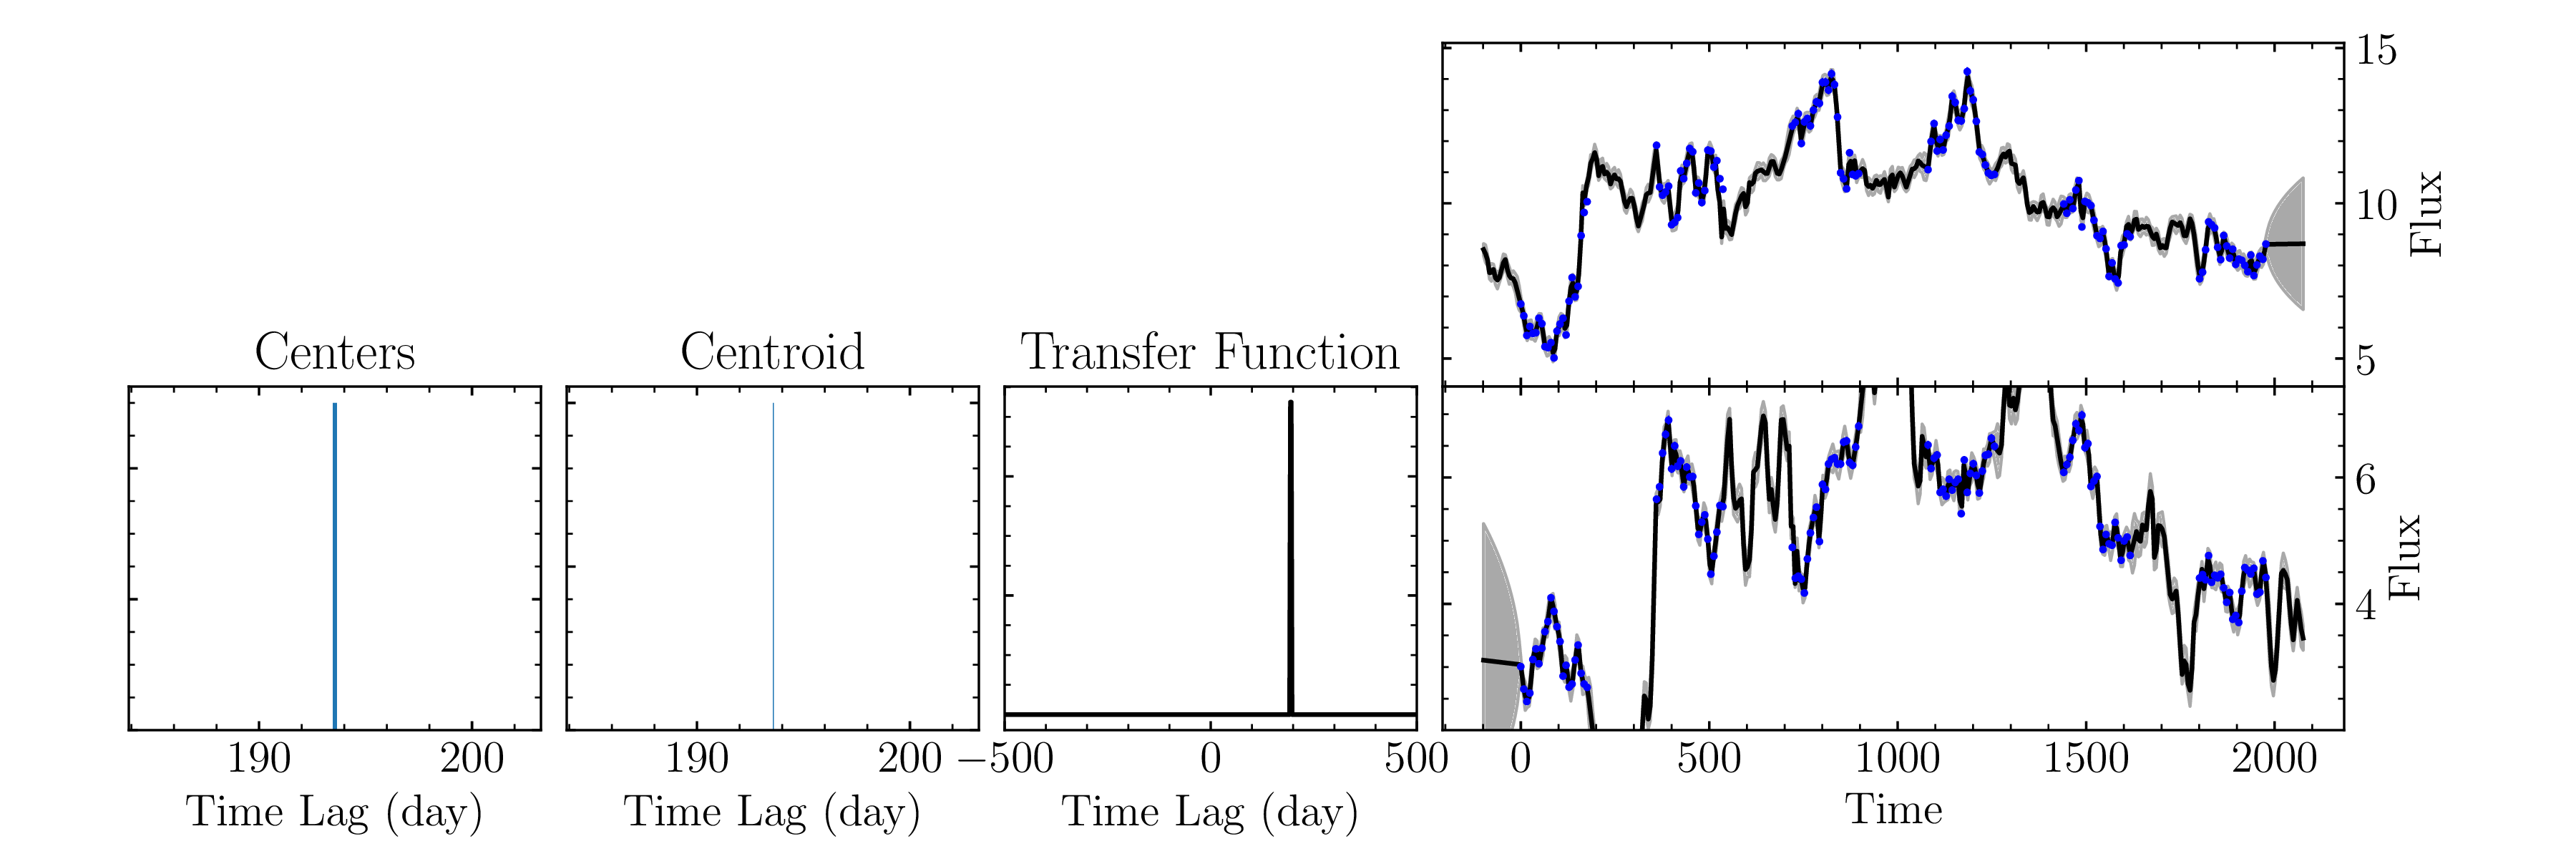

In [1]:
from wand.image import Image as WImage
WImage(filename='mica2_output3/mica2/data/fig_1.pdf[0]', resolution=300)

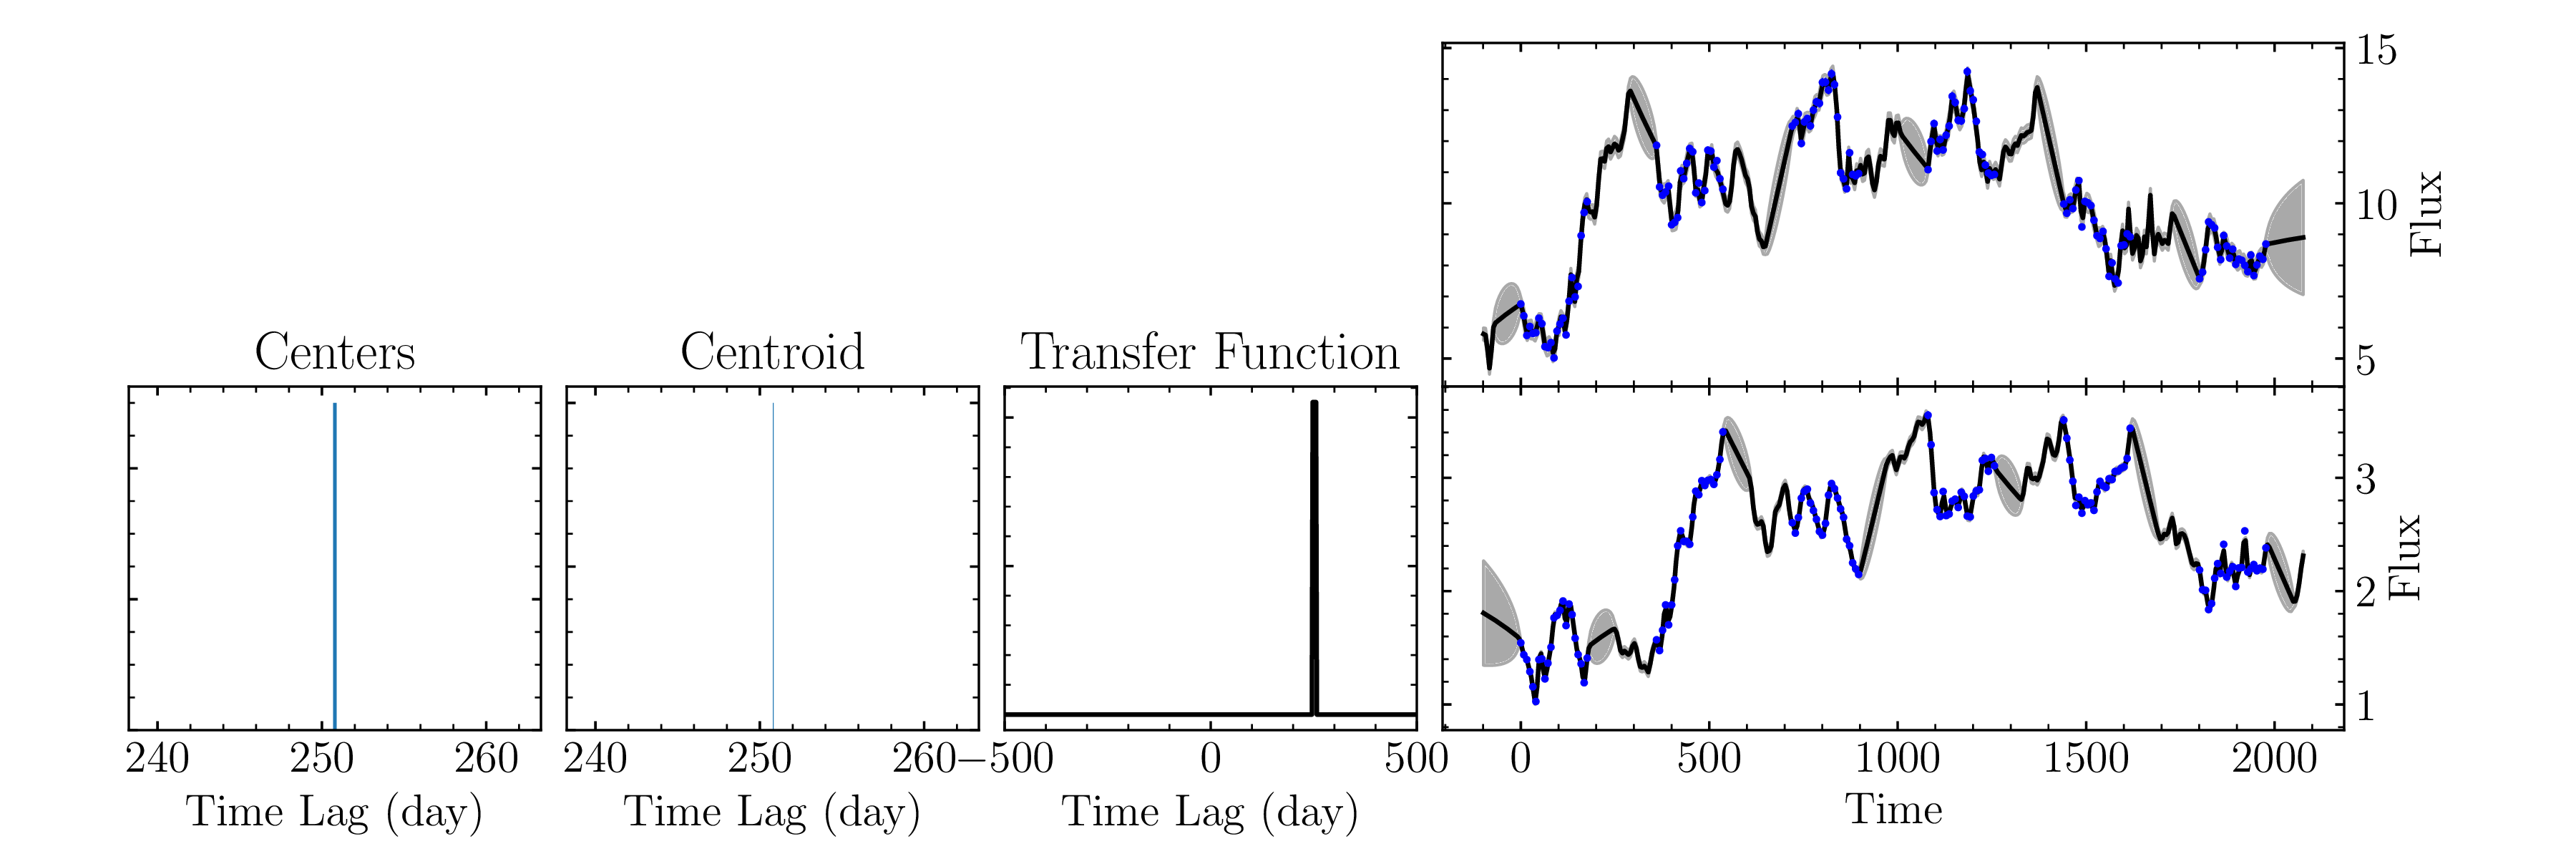

In [2]:
WImage(filename='mica2_output3/mica2/data/fig_1.pdf[1]', resolution=300)

We can see that there are significantly less samples than in the inital tutorial - ``no_order=True`` requires a larger ``max_num_saves`` to properly sample the likelihood distribution when performing multiple runs at once.

However, the MICA2 run correctly identified a lag for both lines.

## Output

In the previous two cases, each line's subdirectory had a ``data/`` and ``param/`` subdirectory. When setting ``no_order=True``, pyPetal will create a ``mica2/`` directory in the main output directory. This directory will store the ``data/`` and ``param/`` subdirectories, while the individual line ``mica2/`` directories will still contain the lag samples, centers, transfer functions, etc.